## **Analysis on Netflix's Worldwide Movies and TV Shows in 2021**

**Spring 2025 Data Science Project**

Created By: Shayan Sobhani, Sahil Patel, Akhil Ramesh, Pranesh Bajracharya

Contributions:

Shayan: I was in charge of making the documentation looked organized for checkpoints 2 and 3, coming up with the type of algorithm we planned on making, did the correlation anaylsis section, did the related links section, adding comments throughout our code, parts C and D, and the data curation section. We all worked together coming up with the different hypothesis tests, the ML algorithm, and testing the dataset to get a higher accuracy score.

Sahil: Specifically, I had the most impact on parts A, D, and G. I found the Netflix dataset and presented it to our group to see if it was a good fit for us. For the ML Algorithm Design/Development, I presented a possible question to train our model to answer. I, along with others, coded the bulk of the ML model and got it to a sufficient test accuracy. I was also in charge of creating the final report.

Akhil: I had the most impact on parts D, E and F. I worked with the team to figure out what ML algortihms we could use to answer our question. I was doing more of the conceptual reaasoning of this part while other team members were working on the hands on coding part. Also for our results, I helped analyze them and create an understanding of what they meant in our situation and in general. I also helped code part of the visualization part and decided to use an ROC curve and confusion matrix.

Pranesh: I was responsible for analyzing the machine learning algorithm’s output and drawing evidence-based conclusions to guide our understanding of its performance and implications. I also worked closely with the team to craft a valid, testable hypothesis suitable for modeling, involving brainstorming research questions, assessing feasibility, and aligning with available data. Once finalized, we collaborated on model structure, data preprocessing, and evaluation strategies to effectively implement the algorithm.


## **Introduction**
We are working with a streaming-video catalogue and building a supervised model that uses metadata to tell children’s titles apart from general-audience titles. We want to find out which features, such as genre tags, runtime, release year, and language, carry the most weight in that distinction. We also plan to compare different algorithms, for example logistic regression and random forests, to see which one does the best job of separating kids content from non-kids content and which feature-engineering steps improve performance the most.

Getting these labels right matters because streaming services need accurate age-appropriate recommendations and reliable parental controls. Automating the tagging process saves time as new shows and movies are added and reduces the need for manual review. It also supports targeted marketing of family collections and guides decisions about acquiring new children’s programming. Finally, this initial work on classification lays a foundation for later analyses, such as predicting runtime or assigning official content ratings.

This project takes data based off Netflix Movies and TV Shows. In this project, we display different plots and create dataframes to make conclusions on the dataset.

## **Data Curation**

The dataset that we used is gathered from here: [Kaggle Dataset!](https://www.kaggle.com/datasets/shivamb/netflix-shows)

We chose to investigate Netflix shows and movies because Netflix is an extremley well-known streaming service which is used all around the world. Depending on where you are from, Netflix have shows that are region dependent, but we found this dataset unique because it shows all content globally! This dataset is taken from the middle of 2021 and at the time, there are 200 million users globally using Netflix. This dataset allows us to explore the international media trends and analyze the different variety that Netflix offers.

The dataset, [netflix_titles.csv](https://www.kaggle.com/datasets/shivamb/netflix-shows), contains information about the TV shows and movies available on Netflix as of 2021. The dataset includes 8,807 entries with a mix of categorical, temporal, and textual features! It includes attributes such as the title, director, cast, country, release year, description, and more! We used this data set to observe the difference movies and shows that are on Netflix and learn more about the variety of options that are available.



Below are the imported libraries that are needed! Below we are importing the data and using Pandas to brind the data in and store the data in Pandas dataframes.

In [ ]:
# Imports the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import ttest_1samp, pearsonr, chisquare


drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/320/netflix_titles.csv')
df.head()

Mounted at /content/drive


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The dataset consists of data with the following features:


*   **show_id**: A unique identifier for each show or movie
*   **type**: Specifies whether the entry is a Movie or a TV Show
*   **title**: The title of the movie or the show
*   **director**: The director's name, which has missing NaN for some entries.
*   **cast:** A list separated by commads of the main actors. Some entries may also be missing.
*   **country**: The countries or country where the film was produced.
*   **date_added**: The date when the title was added to Netflix. Some of the datasets are empty.
*   **release_year**: The year the show or movie was released.
*   **rating**: The age rating to the content which includes R, TV-14, PG-13, etc.
*   **duration**: For movies, it says the length of the movie in minutes. For TV shows, it says the number of seasons it has.
*   **listed_in**: One or more categories or genres the content belongs to.
*   **description**: The short summary of the show or movie.




## Data Preprocessing

We cleaned and prepared the data for analysis. This involved parsing dates, handling missing values, and splitting content into movies and TV shows. We parsed relevant fields like duration and date_added to create a new column duration_num to normalize the duration across TV shows and movies. By organizing the data into structured pandas dataframes, we can split the data into subsets to simplify our data analysis!

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

def extract_duration(duration, show_type):
    if pd.isna(duration):
      # Handles the missing values
        return np.nan
    if show_type == 'Movie':
      # Extracts the minutes if movie
        return int(duration.split()[0])
    elif show_type == 'TV Show':
      # Extracts the seasons if show
        return int(duration.split()[0])
    else:
        return np.nan

df['duration_num'] = df.apply(lambda row: extract_duration(row['duration'], row['type']), axis=1)
# Splitting the data set into movies and tv shows dataframes!
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

Here we are doing Descriptive Statistics and also Data Exploration! We are finding the datatypes, the amount of values missing in the dataset, and the different content types! We are examining the dataset to understand the structure and identify the missing values.

In [ ]:
# Descriptive Statistics and Data Exploration
print("Dataset Information:")
print(df.info())

print("\nThe number of missing values per column:")
print(df.isnull().sum())

print("\nCount of content types:")
print(df['type'].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  duration_num  8804 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB
None

The number of missing values per

##**Exploratory Data Analysis**
## Hypothesis Testing on the Content Type Distribution

We perform both a chi-square test and descriptive statistics to determine whether the Netflix catalog shows an equal representation of Movies and Shows, or if one is more common than the other.

**Hypotheses:**
- **Null Hypothesis (HO):** Movies and TV Shows are equally represented in the Netflix catalog with an even distibution of 50/50.
- **Alternative Hypothesis (HA):** The content types are not equally represented, something other than the 50/50 distribution.

Chi square Test Results:
Observed counts: Movies=6131, TV Shows=2676
Chi square statistic: 1355.40
Chi square p-value: 0.0000


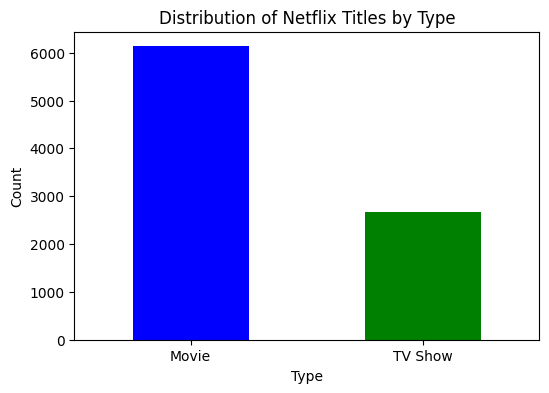

In [ ]:
# Counts the occurences of the movies and tv shows
observed = df['type'].value_counts()
expected = [len(df)/2, len(df)/2]

# Performs the chi-square test to compared the observed and expected frequencies
chi_square, p = chisquare(observed, f_exp=expected)
print("Chi square Test Results:")
print(f"Observed counts: Movies={observed.iloc[0]}, TV Shows={observed.iloc[1]}")
print(f"Chi square statistic: {chi_square:.2f}")
print(f"Chi square p-value: {p:.4f}")


# This makes the distribution using desriptive statistics and the chi-square test!
plt.figure(figsize=(6,4))
observed.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Netflix Titles by Type')
plt.xticks(rotation=0)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Dataset Overview and Content Type with Chi-Square Test:

The Netflix dataset that we imported from kaggle has 8,807 entries which lists different shows, movies, the date they were added, the duration of the film, and more! Many of the fields include data for all the columns, but there some missing values in columns such as the cast, director, and country. The dataset shows that there are 6,131 movies in the dataset, which is more than TV Shows which contains 2,676 entries. Given this large observed difference, we can conclude a large chi-square statistic and the extremely small p value (which was recorded as zero). Therefore, this leads us to reject the null hypothesis and state movies are significantly more represented compared to the TV shows that are provided on Netflix! This imbalance of movies and shows can be due to what the netflix viewers have their preferences for or the production cost! The Chi-square test got the value of 1355.40, which is extremely large. This indicates that the difference between the movies and tv shows, showing the difference is highly significant.

## Hypothesis Testing on Movie Duration

We perform a one-sample t-test on the movie durations to assess whether the average duration is significantly different from a hypothesized mean of **90 minutes**.

**Hypotheses:**
- **Null Hypothesis (HO):** The average movie duration is 90 minutes.
- **Alternative Hypothesis (HA):** The average movie duration is not 90 minutes.

In [ ]:
# Extracts the movie durations and removes missing values
movie_durations = movies['duration_num'].dropna()
# Computes the mean, standartd deviation, and total number of movies
mean_duration = movie_durations.mean()
std_duration = movie_durations.std()
num_movies = movie_durations.count()

print("Movie Duration Statistics:")
print("Mean duration in minutes:", mean_duration)
print("The standard deviation is:", std_duration)
print("Total number of movies:", num_movies)

# Performs the one sample t-test
t_stat, p_value = ttest_1samp(movie_durations, 90)
print("\nOne-sample t test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


Movie Duration Statistics:
Mean duration in minutes: 99.57718668407311
The standard deviation is: 28.290593447417347
Total number of movies: 6128

One-sample t test results:
t-statistic: 26.500573562871065
p-value: 1.342311985065777e-146


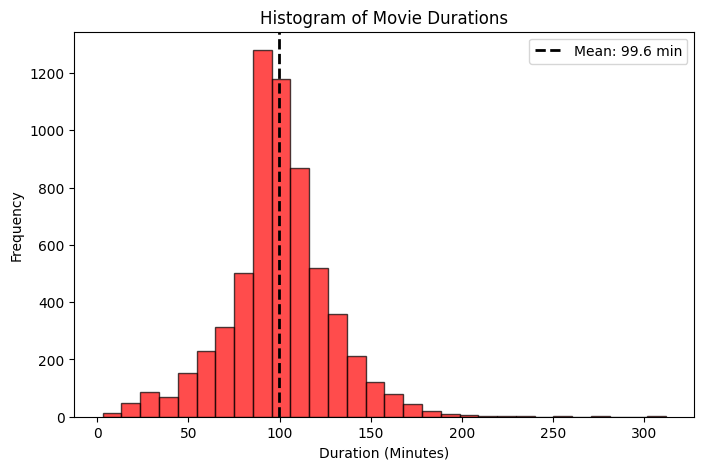

In [ ]:
# Plots the histogram of movie durations
plt.figure(figsize=(8,5))
plt.hist(movie_durations, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.axvline(mean_duration, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_duration:.1f} min')
plt.legend()
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Durations')
plt.show()

Movie Duration Analysis:
For the movies, the average length is approximately 99.58 minutes with a standard deviation of approximately 28.29 minutes, out of 6,128 movies with valid length data. A one-sample t-test of the average length compared to a hypothesized value of 90 minutes returned a t-statistic of 26.50 and an extremely small p-value (1.34e-146). This significant result indicates that the average movie length on Netflix is significantly longer than 90 minutes. Since the p-value is much smaller than the significance level, we reject the null hypothesis and state the average movie length is different from 90 minutes. Since the sample mean is 99.58 minutes and is greater than 90 minutes, we have a right-tailed result!

## Correlation Analysis: Release Year vs Movie Duration

Next, we explore whether there is any relationship between a movie's release year and its duration. We compute the Pearson correlation coefficient for this purpose.

**Hypotheses:**
- **Null Hypothesis (HO):** There is no correlation between release year and movie duration.
- **Alternative Hypothesis (HA):** There is a correlation between release year and movie duration.


In [ ]:
# Prepare data for correlation analysis
movies_correlation = movies[['release_year', 'duration_num']].dropna()
# Calculates the Pearson correlation coefficient and the p-value
pearson_corr_coef, pearson_p_value = pearsonr(movies_correlation['release_year'], movies_correlation['duration_num'])
print("Correlation Analysis:")
print("Pearson correlation coefficient:", pearson_corr_coef)
print("p-value:", pearson_p_value)


Correlation Analysis:
Pearson correlation coefficient: -0.20628474681965608
p-value: 7.017657140476846e-60


Here we are creating the scatter plot which shows the relationship of the release year and how long the movie lasts!

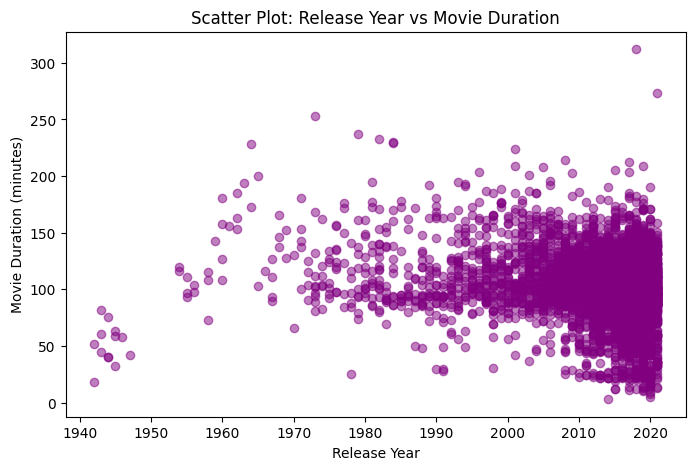

In [ ]:
# Makes the scatter plot with accurate labels and description
plt.figure(figsize=(8,5))
plt.scatter(movies_correlation['release_year'], movies_correlation['duration_num'], alpha=0.5, color='purple')
plt.title('Scatter Plot: Release Year vs Movie Duration')
plt.xlabel('Release Year')
plt.ylabel('Movie Duration (minutes)')
plt.show()

Correlation Analysis:
The Pearson correlation coefficient that we found between a movie’s release year and its duration was -0.206. This was with a p-value of 7.02e-60. What this means is that while the correlation is relatively weak, the result is statistically significant. This implies that, on average, more recent movies tend to have slightly shorter durations. As seen in the scatter plot, a whole bunch of values are in the bottom right corner, confirming that the more recent movies are not as long. Near the 1940s, there are some movies with smaller durations, but there seems to be an increase during the 1960s-1990s! This dataset has 6131 different movies being displayed, so we can also see the trend that as the years go on, there are more movies available on Netflix!

# **Primary Analysis**
# Model: Machine Learning and Analysis

With our original cleaned dataset of of both movie and tv titles, we can do a deeper analysis to see what titles are suitable for children. Parents who let their children use Netflix want to make sure their kids are watching age appropriate content and using machine learning techniques, we can figure out what is appropriate and what is not.

In this first cell, we are doing some pre processing for our analysis and defining our target. We are defining what content we believe to be age appropriate for young children to watch by themselves (content that is rated as G, TV-Y and TV-Y7). After doing some more preprocessing, we also define what features we will be using (release year, duration, cast, description) to predict whether or not a title has a kid rating.

In [ ]:
# Define the binary target
kids_ratings = ["G", "TV-Y", "TV-Y7"]
df = df.copy()
# Drop missing ratings
df = df[df['rating'].notna()]
# Creates column that shows 1 if title has a kid rating and 0 if false
df['is_kids'] = df['rating'].isin(kids_ratings).astype(int)
# Computes the numeric features
df['duration_int'] = pd.to_numeric(df['duration'].str.extract(r'(\d+)').iloc[:,0], errors='coerce').fillna(0).astype(int)
df['cast_count']   = df['cast'].fillna('').apply(lambda x: len(x.split(',')))
df['desc_len']     = df['description'].str.len()

# Prepares X and y
# This creates column of features for predicting if content will have kid rating
feature_cols = ['release_year', 'duration_int', 'cast_count', 'desc_len']
X = df[feature_cols]
y = df['is_kids']

In this second cell, we are splitting our data into training data and test data. We are using an 80-20 split where 80% percent of our data is used for training and 20% percent of our data is used for testing. Here, we start to actually use our machine learning algorithms. We are using a Random Forest Classifier, a Gradient Boosting Classifier, and a Support-Vector Classifier.

The three different machine learning algorithms we use here have their own benefits:

1. Random-Forest Classifier: This algorithm averages around 100 different trees which results in the forest "voting" in borderline cases. This is helpful because kids programs share overlapping but not identical patterns across decades.

2. Gradient-Booster: Gradient boosting trains one tree at a time. Each tree learns from the mistakes of the last. It picks up on shifts in cast count or synopsis length that mark kids titles. The chain of learners often raises accuracy where classes overlap.

3. Support-Vector Classifier: This algorithm draws a boundary using release year, runtime, cast count and synopsis length. When a straight line cannot separate kids and adult titles, the kernel bends to fit the data. This lets it capture patterns such as brief runtimes and simple synopses for children’s programs. It performs well when there are few features but a clear gap between classes.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Split while preserving class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42
)

# These are to instantiate the models
rf  = RandomForestClassifier(n_estimators=100, random_state=42)
gb  = GradientBoostingClassifier(random_state=42)
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Now we fit each of the variables we just made
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Loops over the list of models along with their names to find the accuracies!
for name, model in [('RandomForest', rf), ('GBM', gb), ('SVM', svm)]:
    y_pred = model.predict(X_test)
    acc    = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)


RandomForest accuracy: 0.922
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1625
           1       0.48      0.21      0.30       136

    accuracy                           0.92      1761
   macro avg       0.71      0.60      0.63      1761
weighted avg       0.90      0.92      0.91      1761

----------------------------------------
GBM accuracy: 0.928
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1625
           1       0.67      0.13      0.22       136

    accuracy                           0.93      1761
   macro avg       0.80      0.56      0.59      1761
weighted avg       0.91      0.93      0.90      1761

----------------------------------------
SVM accuracy: 0.923
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1625
           1       0.00      0.00      0.00       136

    accuracy                   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Although all three models report high overall accuracy (92–93%), accuracy alone is misleading. The “non-kids” titles dominate the test set (1625 vs 136). What the precision statistic tells us is “Of the titles the model calls kids, how many really are kids?”. What the recall statistic asks us is “Of all actual kids titles, how many did the model find?”; What the F1-score does is balance those two.

Random Forest: precision 0.48 and recall 0.21 mean it finds only about 1 in 5 kids titles, though fewer than half of its “kids” predictions are wrong.

Gradient Boosting: precision climbs to 0.67, so two-thirds of its kids flags are correct, but recall slips to 0.13—it catches only 1 in 8 kids titles.

SVM: precision and recall are both 0.00; it never predicts the minority class, coasting on class imbalance.

What we can tell from this is that in terms of precision (how many titles are actually kids from what we predicted) the gradient boosting algorithm was the best.

# **Visualization**

In this section, we will use the Receiver Operating Characteristic (ROC) curves, the confusion matrix, and a feature importance chart to evaluate how the classification models are being distinguished between non-kids and kids content. We will compare multiple models and evaluate which model gives the best predictions!

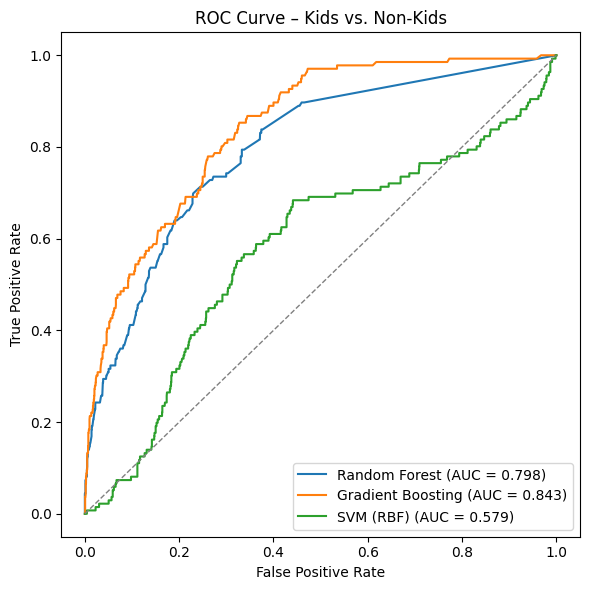

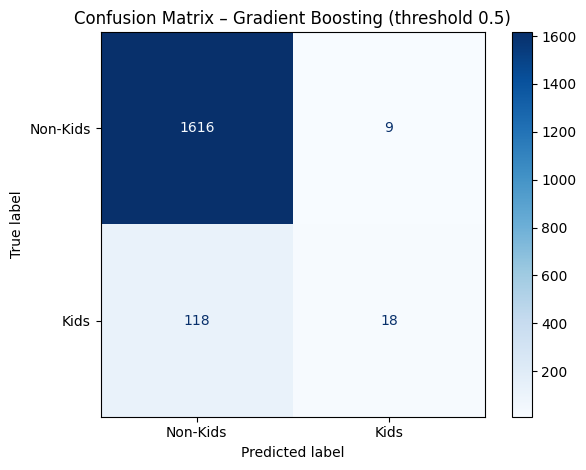

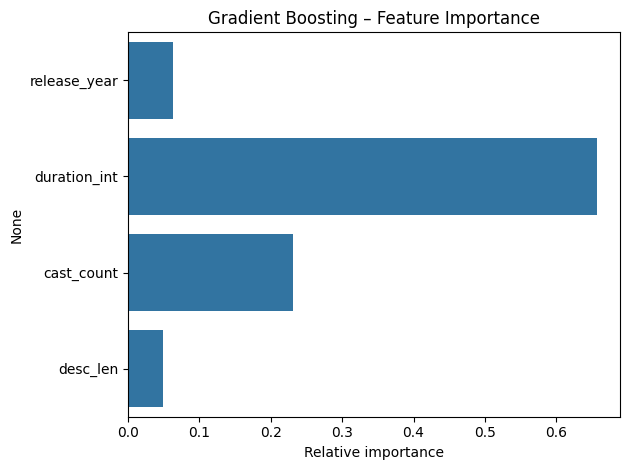

In [ ]:
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc,
    RocCurveDisplay,
    ConfusionMatrixDisplay, confusion_matrix
)

# Set the size of the figure for the ROC curve
plt.figure(figsize=(6, 6))
# Loop through each model to find the ROC curve
for name, clf in [("Random Forest", rf), ("Gradient Boosting", gb), ("SVM (RBF)", svm)]:
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr,
             label=f"{name} (AUC = {auc(fpr, tpr):.3f})")
plt.plot([0, 1], [0, 1], "--", lw=1, color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Kids vs. Non-Kids")
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix
# Choosing the best performing model
best_model = gb
y_pred = best_model.predict(X_test)
# Makes predictions on the test set
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    cmap="Blues",
    display_labels=["Non-Kids", "Kids"]
)
plt.title("Confusion Matrix – Gradient Boosting (threshold 0.5)")
plt.tight_layout()
plt.show()


feat_imp = pd.Series(gb.feature_importances_, index=feature_cols)
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Gradient Boosting – Feature Importance")
plt.xlabel("Relative importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

ROC curve: Each colored line traces how a model’s true-positive rate (detects real kids titles) rises as we allow a higher false-positive rate (adult titles wrongly flagged as kids).

The AUC that you see stands for area under the curve.

A model that can’t tell the difference or guessing completely at random would follow the dotted 45-degree line (AUC = 0.50).

Our Gradient-Boosting line is the furthest toward the top-left and has the best AUC = 0.843. This means it is the most reliable separator.

Random Forest is close behind (AUC = 0.798).

SVM barely beats the dotted line (AUC = 0.579), confirming it struggles with these features.

Confusion matrix: By keeping the Gradient-Boosting’s threshold at 0.50 ,we can see the raw counts it gets right and wrong.

1616 TN  – adult titles correctly left alone.

9 FP – adult titles wrongly shown as kids (very low, < 1%).

18 TP – kids titles correctly found.

118 FN – kids titles the model misses (88% of them).

So, at this threshold the model is extremely cautious (hardly ever lets an adult show through as a kids title) but also sacrifices recall, finding only 1 in 8 real kids titles.

Feature-importance bar chart : This tells us why Gradient-Boosting behaves the way it does

Runtime (duration_int) supplies around 64% of the signal: short films and low-season counts strongly hint “kids.”

Cast size adds around 23%: children’s shows list fewer lead actors.

Release year ( around 6%) and description length (around 4%) contribute only marginally.

Heavy reliance on a single obvious cue (runtime) explains why the model misses many edge-case kids titles (such as longer animated features).

After looking at the different visualizations, Gradient-Boosting turns out to be our sharpest tool because it is better than the other models at telling kids’ shows from everything else. However, it still lets most children’s titles slip through the cracks because we are only feeding it a handful of simple facts like runtime and cast size. If your main worry is avoiding the embarrassment of tagging an adult show as “kids,” our model is already doing that job really well. But, if you also want to find more of the kids’ catalog, you will need to give the model a richer diet. Things such as keywords from the description or a tweak that makes it pay extra attention to the smaller kids class. Therefore, this model does a good job at making sure a young child wouldn't accidentally watch an adult show or movie.

## **Insights and Conclusion**
The project provides a clear and accessible explanation of the classification task, distinguishing kids’ content from adult content on Netflix based solely on metadata (e.g., genre, duration, description). It defines the problem, outlines the data preparation steps, describes the model training process, and explains how decisions are made. Even without prior machine learning knowledge, the walkthrough offers enough context to understand what’s being done and why.

Even for readers familiar with classification models, this project offers fresh insights. The feature engineering is particularly thoughtful, using metadata like description length and cast size to capture patterns unique to kids’ content. It also highlights the real-world challenge of class imbalance, as shown by high overall accuracy but poor recall for the minority class. The comparison across Random Forest, Gradient Boosting, and SVM shows how model choice affects performance, especially under imbalance. Notably, the project demonstrates that metadata alone, without text or video analysis, can yield strong results. This streamlined, interpretable approach serves as a useful blueprint for building lightweight, effective classifiers. Overall, it reinforces best practices while offering practical lessons for improving content-based filtering models.



## **Related Links**

If you want to do more research with data science or learn more about this issue, please look at the following links below:
*   [Confusion Matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)
*   [Correlation Analysis](https://blog.flexmr.net/correlation-analysis-definition-exploration#:~:text=Correlation%20Analysis%20is%20statistical%20method,strong%20that%20relationship%20may%20be.)
*   [One Sample T-test](https://www.jmp.com/en/statistics-knowledge-portal/t-test/one-sample-t-test)
*   [ROC Curve for ML](https://www.geeksforgeeks.org/auc-roc-curve/)

These links further explain the core analytical methods we applied during our project to analyze and interpret the Netflix content data.